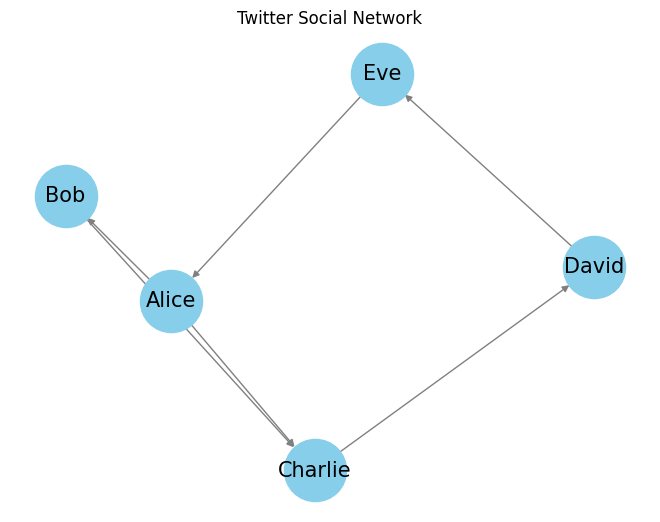

DFS Paths:
['Alice', 'Bob', 'Charlie', 'David']
['Alice', 'Charlie', 'David']
BFS Paths:
['Alice', 'Charlie', 'David']
['Alice', 'Bob', 'Charlie', 'David']


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

users = ['Alice', 'Bob', 'Charlie', 'David', 'Eve']
G.add_nodes_from(users)

G.add_edges_from([('Alice', 'Bob'), ('Bob', 'Charlie'), ('Charlie', 'David'),
                  ('David', 'Eve'), ('Eve', 'Alice'), ('Alice', 'Charlie')])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=15)
plt.title("Twitter Social Network")
plt.show()


def dfs_paths(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for next in set(graph.neighbors(vertex)) - set(path):
            if next == goal:
                yield path + [next]
            else:
                stack.append((next, path + [next]))

def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next in set(graph.neighbors(vertex)) - set(path):
            if next == goal:
                yield path + [next]
            else:
                queue.append((next, path + [next]))


start_node = 'Alice'
goal_node = 'David'

dfs_result = list(dfs_paths(G, start_node, goal_node))
print("DFS Paths:")
for path in dfs_result:
    print(path)

bfs_result = list(bfs_paths(G, start_node, goal_node))
print("BFS Paths:")
for path in bfs_result:
    print(path)


#DFS може знайти шляхи різної довжини, при цьому не факт, що цей шлях буде найкоротшим. Різниця між шляхами залежить від того, яким чином алгоритм проходить вершини.

#BFS завжди буде шукати найкоротший шлях, оскільки він розглядає всі можливі шляхи на одному рівні перед тим як перейти до наступног.

#DFS і BFS можуть знаходити однакові шляхи, якщо граф не містить циклів і всі шляхи мають однакову довжину. Однак BFS є кращим варіантом, якщо потрібно знайти найкоротший шлях, тоді як DFS може знайти різні шляхи в залежності від порядку проходу графа.